# Word2Vec SkipGram Model

In [17]:
import torch

In [18]:
natureText = '''Nature plays a crucial role in sustaining life on Earth, providing essential resources, ecological balance, and aesthetic and cultural value. Below are some reasons why both land and ocean ecosystems are vitally important:
Forests and lands are home to a multitude of species, contributing to biodiversity which is essential for ecosystem resilience and adaptability. Forests act as carbon sinks, absorbing carbon dioxide and other greenhouse gases, thereby mitigating climate change. Natural processes like decomposition contribute to soil fertility, which is essential for agriculture.  Wetlands and forests act as natural filtration systems, helping to purify water. Lands provide essential resources like timber, minerals, and medicinal plants. Natural landscapes like mountains and valleys have significant cultural, spiritual, and aesthetic value for many communities. 
Oceans act as the planet's thermostat, absorbing heat and redistributing it around the globe. Like forests, oceans also act as carbon sinks. Phytoplankton in the sea absorb a significant amount of carbon dioxide. Oceans are biodiversity hotspots, home to a diverse range of species from microscopic phytoplankton to large mammals like whales. Oceans provide a significant portion of the global protein supply, particularly for people living in coastal regions. Phytoplankton in the ocean produce about half of the world's oxygen, making them essential for life on Earth. Oceans are vital for various industries including fishing, tourism, and shipping. Coral reefs and mangroves act as natural barriers, reducing the impact of storms and tsunamis on coastal communities. Both land and ocean ecosystems are intricately connected, and a change or disturbance in one can have far-reaching implications for the other. As such, conservation and sustainable management of both are critical for the survival and well-being of all life forms on Earth.
Both land and ocean ecosystems are intricately connected, and a change or disturbance in one can have far-reaching implications for the other. As such, conservation and sustainable management of both are critical for the survival and well-being of all life forms on Earth.'''

In [19]:
techText = '''Technology is the application of scientific knowledge for practical purposes, especially in industry. Technology plays an indispensable role in modern society, transforming the way we live, work, communicate, and interact. Here's a look at why technology is so crucial:
 Automation in manufacturing, logistics, and even services like banking has made processes faster and more efficient. Advanced technologies can analyze large sets of data to improve decision-making and strategy in fields like healthcare, finance, and urban planning.
  Technology aids in the efficient utilization of resources, reducing waste and enhancing sustainability. The internet and mobile technologies have brought about unprecedented connectivity, shrinking the world into a 'global village.' The internet provides a vast amount of information at our fingertips, democratizing education and knowledge.  Platforms like Facebook and Twitter have changed the way we socialize and share information, also giving a voice to those who might otherwise not be heard.
Technology has transformed the way we communicate, making it easier and faster to connect with people around the world.  Technologies like MRI machines, robotic surgery, and telemedicine have revolutionized healthcare. Wearable technology like fitness trackers help individuals monitor their own health and activity levels. While automation does displace some jobs, technology also creates new roles that didn't exist before, such as app developers and data analysts. E-commerce and digital marketing technologies enable businesses to reach customers globally.
  Technology fuels innovation, which in turn leads to new products, services, and business models, contributing to economic growth.
 Online courses and platforms provide accessible education opportunities to people all around the world. Technology enables real-time collaboration, making it easier for students and educators to interact, share information, and work together.
    Advanced technologies like drones and AI-powered analytics can help in effective disaster management. Assistive technologies make it easier for people with disabilities to engage with their environments.
Digital governance solutions can improve transparency, reduce corruption, and enhance public services. Advanced technologies are used in public safety operations, including criminal investigations and national defense.
"Algorithm", "Software", "Hardware", "Internet", "Network","telemedicine","wearable technology",
    "Database", "Cloud", "Computing", "Cybersecurity", "Encryption",
    "Protocol", "Virtualization", "Artificial Intelligence", "Machine Learning", "Data Science",
    "Big Data", "Blockchain", "Augmented Reality",
    "Virtual Reality", "Automation", "Robotics", "Firmware", "Bandwidth",
    "Interface", "Open Source", "Web Development", "Mobile App", "E-commerce",
    "Digital Marketing", "Search Engine", "Social Media", "Streaming", "Multimedia",
    "Gamification", "UX", "API", "Framework", "Operating System",
    "Compiler", "Debugging", "DevOps", "Scalability", "High Availability",
    "Microservices", "SaaS", "PaaS", "IaaS", "Fintech"'''

In [20]:
# words in natureText
natureWords = natureText.split()
print(f'No. nature words: {len(natureWords)}')
# words in techText
techWords = techText.split()
print(f'No. tech words: {len(techWords)}')

No. nature words: 323
No. tech words: 390


In [21]:
# generate a corpus about areas of nature and technology
# use the corpus to train a skipgram modelfrom collections import Counter
from torch.utils.data import DataLoader, TensorDataset

# Sample text corpus
corpus = natureText + techText
corpus = corpus.lower().replace('.', '')  # Preprocessing: to lower case and remove punctuation

# Tokenize and build vocabulary
tokens = corpus.split()
vocab = set(tokens)
vocab_size = len(vocab)
word_to_index = {word: i for i, word in enumerate(vocab)}
index_to_word = {i: word for word, i in word_to_index.items()}

# Generate target-context pairs with window size 1
target_context_pairs = []
for i, target in enumerate(tokens):
    context = [tokens[j] for j in range(max(0, i-1), min(len(tokens), i+2)) if j != i]
    for c in context:
        target_context_pairs.append((word_to_index[target], word_to_index[c]))

# Convert to tensors
targets, contexts = zip(*target_context_pairs)
target_tensor = torch.LongTensor(targets)
context_tensor = torch.LongTensor(contexts)

# Create DataLoader for training data
batch_size = 10
train_dataset = TensorDataset(target_tensor, context_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Display vocabulary and some sample pairs
vocab, target_context_pairs[:5]


({'"algorithm",',
  '"api",',
  '"artificial',
  '"augmented',
  '"automation",',
  '"bandwidth",',
  '"big',
  '"blockchain",',
  '"cloud",',
  '"compiler",',
  '"computing",',
  '"cybersecurity",',
  '"data',
  '"database",',
  '"debugging",',
  '"devops",',
  '"digital',
  '"e-commerce",',
  '"encryption",',
  '"fintech"',
  '"firmware",',
  '"framework",',
  '"gamification",',
  '"hardware",',
  '"high',
  '"iaas",',
  '"interface",',
  '"internet",',
  '"machine',
  '"microservices",',
  '"mobile',
  '"multimedia",',
  '"network","telemedicine","wearable',
  '"open',
  '"operating',
  '"paas",',
  '"protocol",',
  '"robotics",',
  '"saas",',
  '"scalability",',
  '"search',
  '"social',
  '"software",',
  '"streaming",',
  '"ux",',
  '"virtual',
  '"virtualization",',
  '"web',
  "'global",
  'a',
  'about',
  'absorb',
  'absorbing',
  'accessible',
  'act',
  'activity',
  'adaptability',
  'advanced',
  'aesthetic',
  'agriculture',
  'ai-powered',
  'aids',
  'all',
  'also',


In [22]:
import torch
import torch.nn as nn
import torch.optim as optim
import random

# Define the Skip-gram model
class SkipGram(nn.Module):
    def __init__(self, vocab_size, embed_dim):
        super(SkipGram, self).__init__()
        self.in_embed = nn.Embedding(vocab_size, embed_dim)
        self.out_embed = nn.Embedding(vocab_size, embed_dim)

    def forward(self, target, context):
        in_embeds = self.in_embed(target)
        out_embeds = self.out_embed(context)
        
        # Calculate dot product for each pair and reshape to (B, vocab_size)
        scores = torch.matmul(in_embeds, self.out_embed.weight.t())
        
        return scores

# Generate sample data (target, context)
def generate_sample_data(num_samples=1000, vocab_size=100):
    target_words = [random.randint(0, vocab_size-1) for _ in range(num_samples)]
    context_words = [random.randint(0, vocab_size-1) for _ in range(num_samples)]
    return target_words, context_words

# Initialize model and parameters
#vocab_size = vocab_size
embed_dim = 10
skipgram_model = SkipGram(vocab_size, embed_dim)

# Generate sample data
num_samples = 1000
target_words, context_words = generate_sample_data(num_samples, vocab_size)
target_tensor = torch.LongTensor(target_words)
context_tensor = torch.LongTensor(context_words)

# Training configurations
learning_rate = 0.01
num_epochs = 1000
batch_size = 32

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(skipgram_model.parameters(), lr=learning_rate)

# Training loop
for epoch in range(num_epochs):
    # Shuffle data
    shuffle_indices = torch.randperm(num_samples)
    target_tensor = target_tensor[shuffle_indices]
    context_tensor = context_tensor[shuffle_indices]
    
    for i in range(0, num_samples, batch_size):
        # Prepare mini-batch
        target_batch = target_tensor[i:i+batch_size]
        context_batch = context_tensor[i:i+batch_size]
        
        # Forward pass
        scores = skipgram_model(target_batch, context_batch)
        
        # Compute loss
        loss = criterion(scores, context_batch)
        
        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

print("Training completed.")


Epoch [10/1000], Loss: 5.9782
Epoch [20/1000], Loss: 2.3304
Epoch [30/1000], Loss: 2.5925
Epoch [40/1000], Loss: 1.8347
Epoch [50/1000], Loss: 1.9419
Epoch [60/1000], Loss: 1.6948
Epoch [70/1000], Loss: 0.8091
Epoch [80/1000], Loss: 1.8626
Epoch [90/1000], Loss: 1.7697
Epoch [100/1000], Loss: 1.7777
Epoch [110/1000], Loss: 1.5375
Epoch [120/1000], Loss: 1.5293
Epoch [130/1000], Loss: 1.6567
Epoch [140/1000], Loss: 1.6714
Epoch [150/1000], Loss: 1.8251
Epoch [160/1000], Loss: 1.5969
Epoch [170/1000], Loss: 1.7786
Epoch [180/1000], Loss: 1.5369
Epoch [190/1000], Loss: 1.5170
Epoch [200/1000], Loss: 1.4292
Epoch [210/1000], Loss: 1.2633
Epoch [220/1000], Loss: 1.2258
Epoch [230/1000], Loss: 1.4238
Epoch [240/1000], Loss: 1.2437
Epoch [250/1000], Loss: 1.3523
Epoch [260/1000], Loss: 2.3824
Epoch [270/1000], Loss: 1.2398
Epoch [280/1000], Loss: 1.5184
Epoch [290/1000], Loss: 1.3820
Epoch [300/1000], Loss: 1.3699
Epoch [310/1000], Loss: 1.5561
Epoch [320/1000], Loss: 1.9350
Epoch [330/1000],

In [23]:
# Save the model to skipgram_model.pth
torch.save(skipgram_model.state_dict(), 'skipgram_model.pth')

In [24]:
# Load the saved model
model = SkipGram(len(vocab), embed_dim)
model.load_state_dict(torch.load('skipgram_model.pth'))
model.eval()

# Get the embeddings
def get_embedding(word):
    if word in word_to_index:
        word_idx = torch.tensor([word_to_index[word]], dtype=torch.long)
        return model.in_embed(word_idx).detach().numpy()
    else:
        return None  # or handle OOV differently

# Example usage
embedding_vector = get_embedding('nature')
print(f'nature is represented by {embedding_vector}')
# shape of embedding vector
print(f'Shape of embedding vector: {embedding_vector.shape}')



nature is represented by [[-0.99453473  0.9277355  -0.71976423  2.1582243  -0.73324347  0.36960497
   1.5852927  -2.8789659  -0.04451544  1.0771995 ]]
Shape of embedding vector: (1, 10)


## Generate embeddings for the words we want to plot

In [25]:
# This generates embeddings for the words but only if they are in the vocabulary
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# get list of words we want to embed 
# Generate a list of 50 words related to nature
nature_related_words = [
    "ecosystem", "wildlife", "conservation", "biodiversity", "sustainability",
    "flora", "fauna", "habitat", "natural", "organic",
    "climate", "weather", "season", "rain", "sunlight",
    "soil", "earth", "land", "geology", "topography",
    "waterfall", "lake", "ocean", "sea", "river",
    "mountain", "hill", "valley", "desert", "plain",
    "tree", "plant", "flower", "bush", "forest",
    "animal", "bird", "fish", "insect", "mammal",
    "pollution", "recycle", "renewable", "solar", "wind",
    "air", "atmosphere", "cloud", "fog", "mist"
]
# List of 50 technology-related words
tech_related_words = [
    "Algorithm", "Software", "Hardware", "Internet", "Network","telemedicine","wearable technology",
    "Database", "Cloud", "Computing", "Cybersecurity", "Encryption",
    "Protocol", "Virtualization", "Artificial Intelligence", "Machine Learning", "Data Science",
    "Big Data", "Blockchain", "Augmented Reality",
    "Virtual Reality", "Automation", "Robotics", "Firmware", "Bandwidth",
    "Interface", "Open Source", "Web Development", "Mobile App", "E-commerce",
    "Digital Marketing", "Search Engine", "Social Media", "Streaming", "Multimedia",
    "Gamification", "UX", "API", "Framework", "Operating System",
    "Compiler", "Debugging", "DevOps", "Scalability", "High Availability",
    "Microservices", "SaaS", "PaaS", "IaaS", "Fintech"
]


# Combine the two lists
vocab = nature_related_words + tech_related_words
print(f'No. of words in vocab: {len(vocab)}')
# loop over the vocab and get the embeddings and create a dataframe with the words and embeddings
# use the scipgram model to get the embeddings
new_vocab = []
embeddings = []
for word in vocab:
    embedding = get_embedding(word)
    if embedding is not None:
        print(f'{word} is represented by {embedding}')
        new_vocab.append(word)
        embeddings.append(embedding)
    else:
        print(f'{word} is not in the vocabulary')

# flatten the embeddings
embeddings = np.array(embeddings).reshape(-1, 10)
        
print(f'Embeddings shape: {embeddings.shape}')



No. of words in vocab: 100
ecosystem is represented by [[-1.2704614   4.3802204   0.87985706 -0.928356   -0.26460582 -1.26492
  -0.23143591  0.20612109 -0.9678353  -0.72932625]]
wildlife is not in the vocabulary
conservation is represented by [[-2.5326161  -0.82572985 -1.0859742  -0.62679845 -2.9023464   0.39041424
  -1.2500175   1.542815    0.89255154  0.7242502 ]]
biodiversity is represented by [[-2.0865026  3.1958692 -1.8238219  1.7987095  1.1964042  7.796776
   4.0231924 -1.2179452 -2.2159948 -3.3980386]]
sustainability is represented by [[ 0.38635534 -1.0913099  -0.14624982  0.82812756  0.4624435   0.12385934
  -0.96365005  0.5230541   0.32106417 -0.48999843]]
flora is not in the vocabulary
fauna is not in the vocabulary
habitat is not in the vocabulary
natural is represented by [[ 1.049462   2.0066338 -2.7551942  4.7722936  5.9906054  1.5209888
   2.561543   6.0458903  0.7573673 -0.6657194]]
organic is not in the vocabulary
climate is represented by [[ 0.46669906 -2.3405116   1.1

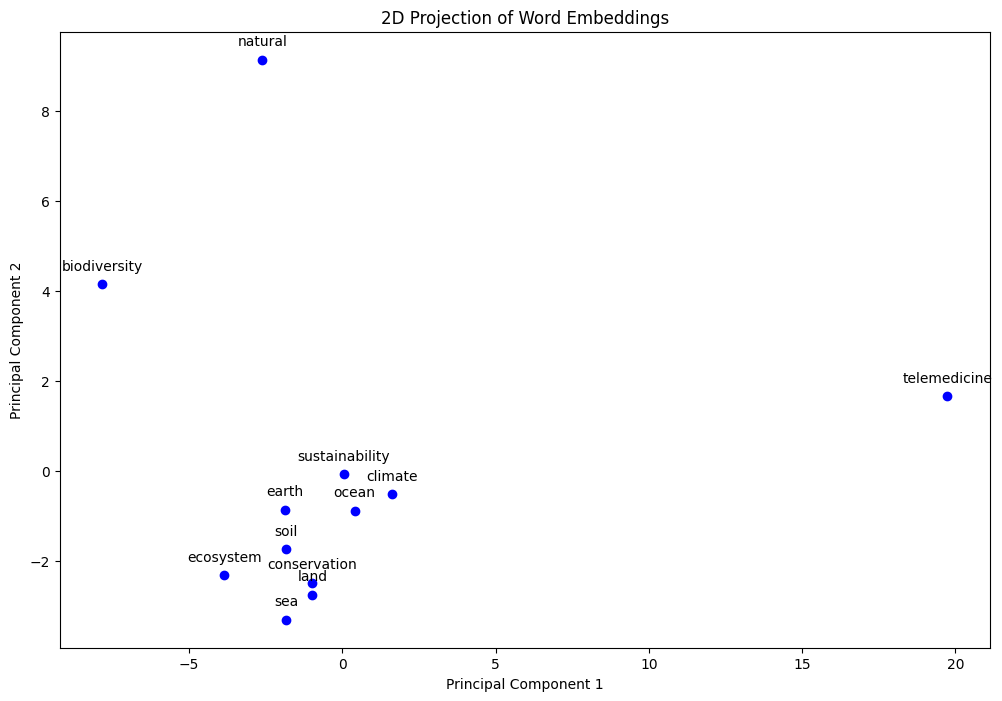

In [26]:


# Perform PCA to reduce the dimensions to 2D
pca = PCA(n_components=2)
embeddings_2d = pca.fit_transform(embeddings)

# Plot the 2D embeddings
plt.figure(figsize=(12, 8))
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c='blue')

# Annotate the points
for i, word in enumerate(new_vocab):
    plt.annotate(word, (embeddings_2d[i, 0], embeddings_2d[i, 1]), textcoords="offset points", xytext=(0,10), ha='center')

plt.title('2D Projection of Word Embeddings')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Synthetic Embeddings just for show

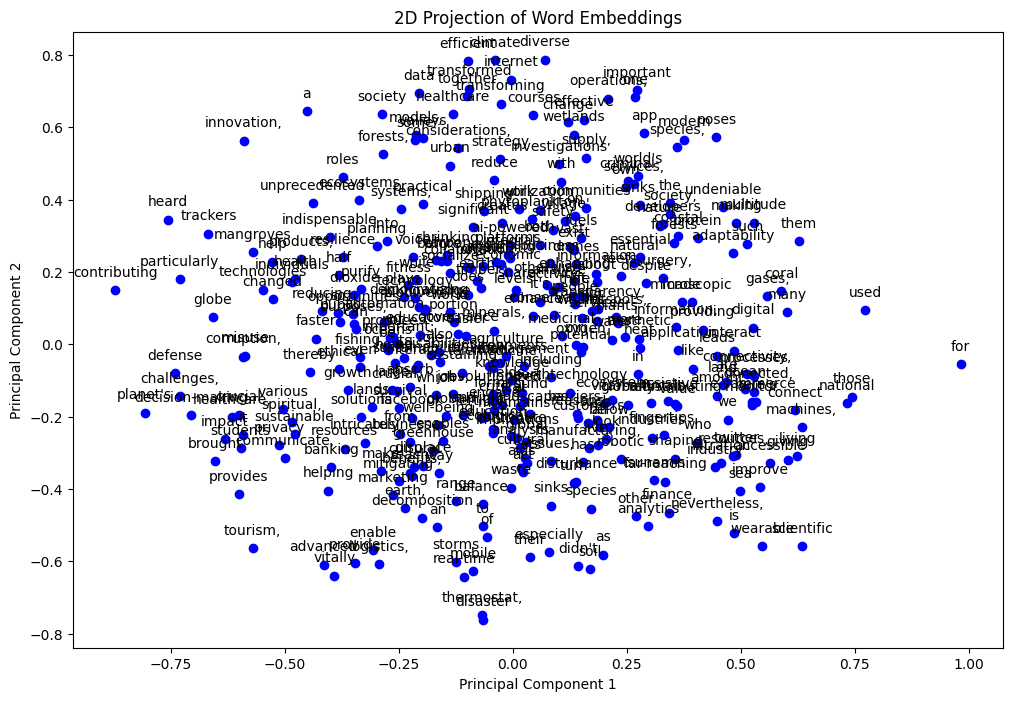

In [13]:
# NOTE THIS IS THE END OF THE SKIPGRAM MODEL
# This generates random embeddings for the words in the vocabulary
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Generate 10-dimensional embeddings for the new words
# In a real-world scenario, these would be obtained by fine-tuning the model on new data
np.random.seed(0)  # for reproducibility
embeddings = np.random.rand(len(vocab), 10)



# Perform PCA to reduce the dimensions to 2D
pca = PCA(n_components=2)
embeddings_2d = pca.fit_transform(embeddings)

# Plot the 2D embeddings
plt.figure(figsize=(12, 8))
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c='blue')

# Annotate the points
for i, word in enumerate(vocab):
    plt.annotate(word, (embeddings_2d[i, 0], embeddings_2d[i, 1]), textcoords="offset points", xytext=(0,10), ha='center')

plt.title('2D Projection of Word Embeddings')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()
